<a href="https://colab.research.google.com/github/DaffaHamsy/Mini-Project-SLO2/blob/main/CIFAR_10_and_CIFAR_100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

memuat dataset CIFAR-10 dan CIFAR-100

In [ ]:
# CIFAR-10
(cifar10_train_images, cifar10_train_labels), (cifar10_test_images, cifar10_test_labels) = datasets.cifar10.load_data()

# CIFAR-100
(cifar100_train_images, cifar100_train_labels), (cifar100_test_images, cifar100_test_labels) = datasets.cifar100.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 218s 1us/step
169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 382s 2us/step


memeriksa dimensi dan kelas dari dataset CIFAR-10 dan CIFAR-100

In [ ]:
# Cek kelas dan ukuran image
cifar10_train_images.shape
np.unique(cifar10_test_labels).shape

cifar100_train_images.shape
np.unique(cifar100_test_labels).shape

(50000, 32, 32, 3)

dataset training CIFAR-100 memiliki 50,000 gambar. Setiap gambar memiliki dimensi 32x32 piksel. Gambar tersebut memiliki warna dengan 3 kanal warna atau (RGB).

melakukan normalisasi pada dataset, Normalisasi ini mengubah rentang nilai piksel dari [0, 255] menjadi [0, 1].

In [ ]:
# Normalisasi CIFAR-10
cifar10_train_images, cifar10_test_images = cifar10_train_images / 255.0, cifar10_test_images / 255.0

# Normalisasi CIFAR-100
cifar100_train_images, cifar100_test_images = cifar100_train_images / 255.0, cifar100_test_images / 255.0


membangun model CNN untuk klasifikasi gambar dari dataset CIFAR-10.

In [ ]:
def build_cnn_model_cifar10(num_classes):
    model_cifar10 = models.Sequential()
    model_cifar10.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model_cifar10.add(layers.MaxPooling2D((2, 2)))
    model_cifar10.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model_cifar10.add(layers.MaxPooling2D((2, 2)))
    model_cifar10.add(layers.Conv2D(64, (3, 3), activation='relu'))

    model_cifar10.add(layers.Flatten())
    model_cifar10.add(layers.Dense(64, activation='relu'))
    model_cifar10.add(layers.Dense(num_classes, activation='softmax'))

    return model_cifar10


training model CNN yang telah dibangun sebelumnya untuk dataset CIFAR-10. dan mengompilasi Model dengan optimizer, loss dan matriks

In [ ]:
# CIFAR-10
cifar10_model = build_cnn_model_cifar10(10)
cifar10_model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

history_cifar10 = cifar10_model.fit(cifar10_train_images, cifar10_train_labels, epochs=10,
                                    validation_data=(cifar10_test_images, cifar10_test_labels))


d:\F7X\tingkat 1\New folder\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 33ms/step - accuracy: 0.3315 - loss: 1.7921 - val_accuracy: 0.5421 - val_loss: 1.2851
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.5661 - loss: 1.2183 - val_accuracy: 0.6065 - val_loss: 1.1029
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 29ms/step - accuracy: 0.6263 - loss: 1.0624 - val_accuracy: 0.6515 - val_loss: 1.0034
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 29ms/step - accuracy: 0.6663 - loss: 0.9496 - val_accuracy: 0.6608 - val_loss: 0.9753
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.6955 - loss: 0.8614 - val_accuracy: 0.6765 - val_loss: 0.9284
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.7155 - loss: 0.8085 - val_accuracy: 0.6877 - val_loss: 0.9046
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.7344 - loss: 0.7511 - val_accuracy: 0.6755 - val_loss: 0.9415
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.7488 -

membangun model CNN untuk klasifikasi gambar dari dataset CIFAR-100.

In [ ]:
def build_cnn_model_cifar100(num_classes):
    model_cifar100 = models.Sequential()
    model_cifar100.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model_cifar100.add(layers.MaxPooling2D((2, 2)))
    model_cifar100.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model_cifar100.add(layers.MaxPooling2D((2, 2)))

    model_cifar100.add(layers.Flatten())
    model_cifar100.add(layers.Dense(256, activation='relu'))
    model_cifar100.add(layers.Dense(num_classes, activation='softmax'))


    return model_cifar100
build_cnn_model_cifar100(100).summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 13, 13, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 331,012 (1.26 MB)

 Trainable params: 331,012 (1.26 MB)

 Non-trainable params: 0 (0.00 B)

training model CNN yang telah dibangun sebelumnya untuk dataset CIFAR-100. dan mengompilasi Model dengan optimizer, loss dan matriks

In [ ]:
# CIFAR-100
cifar100_model = build_cnn_model_cifar100(100)
cifar100_model.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

history_cifar100 = cifar100_model.fit(cifar100_train_images, cifar100_train_labels, epochs=10,
                                      validation_data=(cifar100_test_images, cifar100_test_labels))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 20ms/step - accuracy: 0.0939 - loss: 4.0193 - val_accuracy: 0.2386 - val_loss: 3.1519
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.2654 - loss: 2.9962 - val_accuracy: 0.2925 - val_loss: 2.8792
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.3346 - loss: 2.6585 - val_accuracy: 0.3217 - val_loss: 2.7535
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.3805 - loss: 2.4302 - val_accuracy: 0.3284 - val_loss: 2.7509
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.4222 - loss: 2.2253 - val_accuracy: 0.3475 - val_loss: 2.5938
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.4520 - loss: 2.0769 - val_accuracy: 0.3643 - val_loss: 2.5693
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.4890 - loss: 1.9206 - val_accuracy: 0.3704 - val_loss: 2.5907
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.5180 -

In [ ]:
test_loss_cifar10, test_acc_cifar10 = cifar10_model.evaluate(cifar10_test_images, cifar10_test_labels, verbose=2)
print(f'Test accuracy for CIFAR-10: {test_acc_cifar10}')


313/313 - 3s - 11ms/step - accuracy: 0.7112 - loss: 0.8769
Test accuracy for CIFAR-10: 0.7111999988555908


In [ ]:
test_loss_cifar100, test_acc_cifar100 = cifar100_model.evaluate(cifar100_test_images, cifar100_test_labels, verbose=2)
print(f'Test accuracy for CIFAR-100: {test_acc_cifar100}')


313/313 - 2s - 6ms/step - accuracy: 0.3630 - loss: 2.8474
Test accuracy for CIFAR-100: 0.3630000054836273


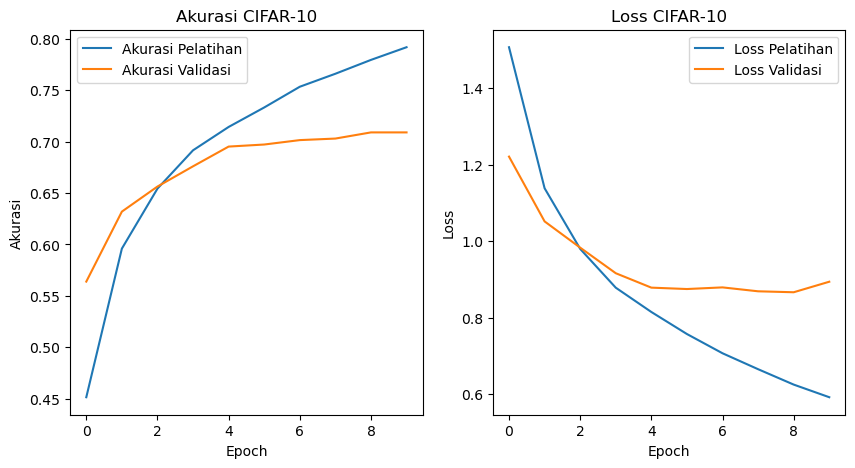

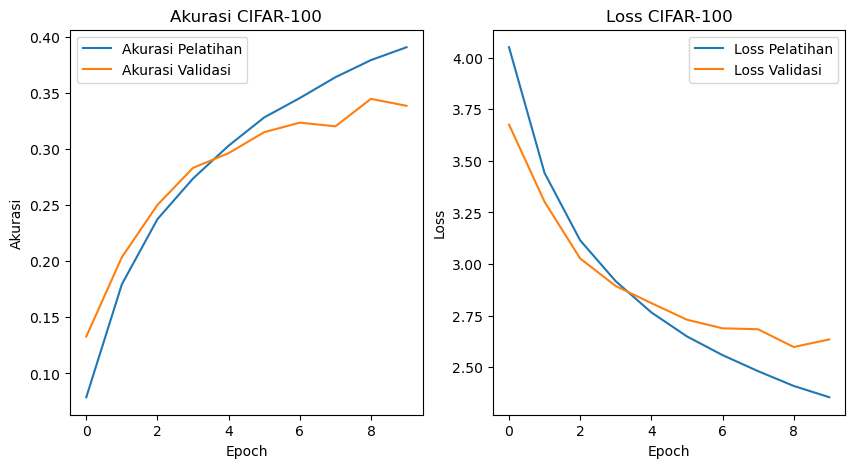

In [ ]:
def plot_history(history, title):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Akurasi Pelatihan')
    plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
    plt.xlabel('Epoch')
    plt.ylabel('Akurasi')
    plt.legend()
    plt.title(f'Akurasi {title}')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Loss Pelatihan')
    plt.plot(history.history['val_loss'], label='Loss Validasi')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(f'Loss {title}')
    plt.show()

# Plot CIFAR-10
plot_history(history_cifar10, 'CIFAR-10')

# Plot CIFAR-100
plot_history(history_cifar100, 'CIFAR-100')
